In [26]:
import pandas as pd
df = pd.read_csv('C:/Users/fanni/Documents/Code/MarkStuff/DS2.csv', delimiter=';')


# change the weird french excel to english
for col in df.columns:
    if col != 'student' and col != 'Nom':
        # Check if the column contains strings that represent numbers
        if df[col].dtype == 'O':
            # Replace commas with periods and convert to float
            df[col] = df[col].str.replace(',', '.').astype(float)

#anonymise(?) the students
df['Nom'] = df['Nom'].astype('category').cat.codes
df


,Nom,Note/20,Note/16/20,Note finale
0,13,15.0,15.00,15.00
1,17,7.0,8.75,8.00
2,8,8.0,10.00,9.00
3,20,14.5,15.50,14.50
4,2,11.0,13.75,12.50
5,18,2.0,2.50,2.50
6,1,8.0,8.00,8.00
7,19,7.0,7.00,7.00
8,26,16.0,16.00,16.00
9,0,17.5,17.50,17.50


Text(0.5, 0, 'Noms anonymisés par un nombre aléatoire')

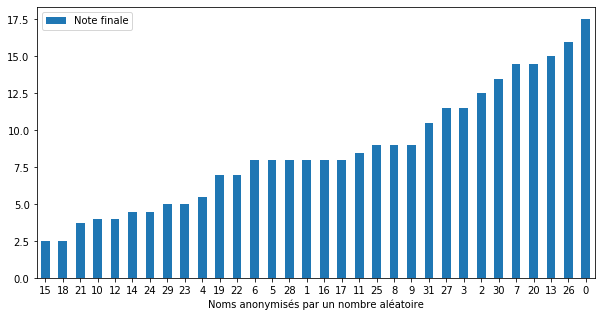

In [35]:
#ordering by increasing mark
df.sort_values(by=['Note finale'], inplace=True)
df.plot.bar(x='Nom', y='Note finale', rot=0)

plt.xlabel('Noms anonymisés par un nombre aléatoire') 



c:\Users\fanni\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':
c:\Users\fanni\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\fanni\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing i

8.0
8.6171875


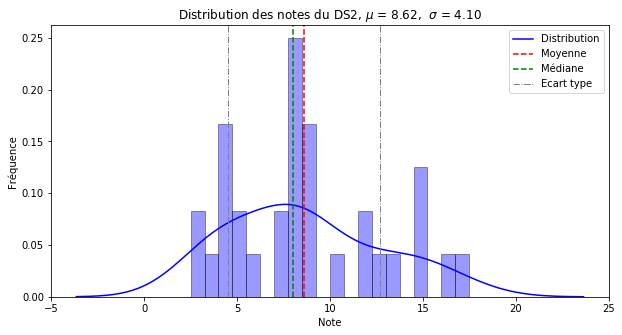

In [30]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot the histogram
sns.distplot(df['Note finale'], hist=True,  
             bins=20, color = 'blue', 
            hist_kws={'edgecolor':'black'})

# Plot the PDF
title = "Distribution des notes du DS2, $\mu$ = %.2f,  $\sigma$ = %.2f" % (df['Note finale'].mean(), df['Note finale'].std())
plt.title(title)
plt.xlabel('Note')
plt.ylabel('Fréquence')


plt.axvline(df['Note finale'].mean(), color='r', linestyle='--', linewidth=1.5)
plt.axvline(df['Note finale'].median(), color='g', linestyle='--', linewidth=1.5)
plt.axvline(df['Note finale'].mean() + df['Note finale'].std(), color='grey', linestyle='-.', linewidth=1)
plt.axvline(df['Note finale'].mean() - df['Note finale'].std(), color='grey', linestyle='-.', linewidth=1)
plt.legend(['Distribution','Moyenne','Médiane', 'Ecart type'])


#make the graph bigger
plt.rcParams["figure.figsize"] = (10,5)

#Median
print(df['Note finale'].median())
#Average
print(df['Note finale'].mean())

In [29]:
#The second most common mark
df['Note finale'].value_counts().index[2]

5.0